In [1]:
import numpy as np

from keras.layers import Dense, LSTM, TimeDistributed, Input
from keras.models import Model
from seq2seq.models import SimpleSeq2Seq

from sklearn.preprocessing import label_binarize

from IPython.display import Image

Using TensorFlow backend.


In [2]:
# number of objects
n_objects = 100
# dimensionality of feature space
n_features = 20
# number of timesteps in case of sequence
n_timesteps = 10
# number of classes
n_classes = 5

We're going to cover how to implement different RNN types with Keras

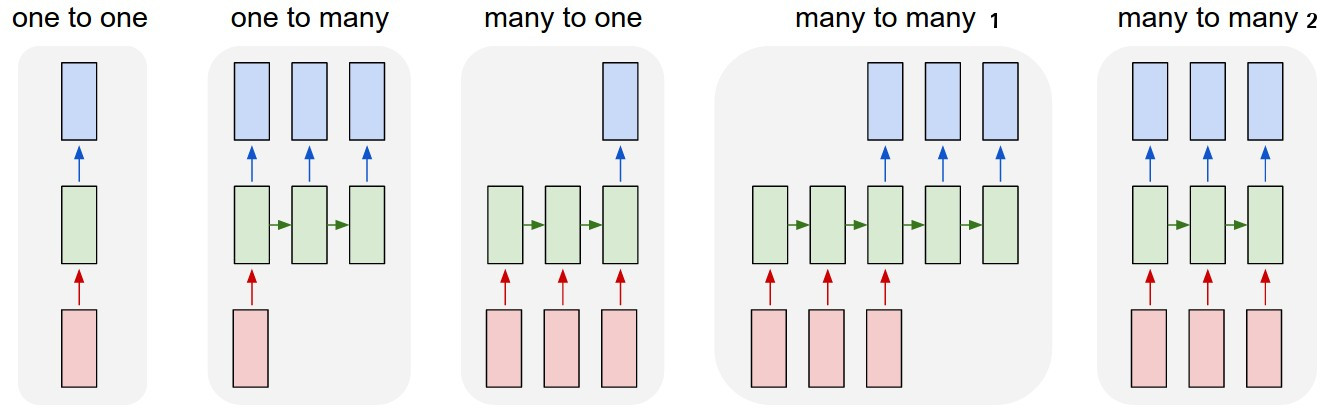

In [3]:
Image("./pics/rnntypes.jpeg")

# One-to-One

Vanilla mode of processing without RNN, from fixed-sized input to fixed-sized output

**Example:** Image classification (see *MLP_Iris* or *CNN_MNIST* notebooks)

## Input

In [4]:
X = np.random.rand(n_objects, n_features)
y = np.random.randint(n_classes, size=(n_objects,))
y = label_binarize(y, classes=range(n_classes))

In [5]:
print("X shape (objects, features):", X.shape)
print("y shape (objects, classes):", y.shape)

X shape (objects, features): (100, 20)
y shape (objects, classes): (100, 5)


## Architecture

In [6]:
inp = Input(shape=X.shape[1:], name="Input")
hid = Dense(128, name="Hidden")(inp)
out = Dense(n_classes, activation="softmax", name="Softmax")(hid)

model = Model(inputs=[inp], outputs=[out])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 20)                0         
_________________________________________________________________
Hidden (Dense)               (None, 128)               2688      
_________________________________________________________________
Softmax (Dense)              (None, 5)                 645       
Total params: 3,333
Trainable params: 3,333
Non-trainable params: 0
_________________________________________________________________


# One-to-Many

Sequence output and fixed-size input

**Example:** Image captioning

## Input

In [7]:
X = np.random.rand(n_objects, 1, n_features)
y = np.random.randint(n_classes, size=(n_objects, n_timesteps))
y = np.array(list(map(lambda x: label_binarize(x, classes=range(n_classes)), y)))

In [8]:
print("X shape (objects, timesteps, features):", X.shape)
print("y shape (objects, timesteps, classes):", y.shape)

X shape (objects, timesteps, features): (100, 1, 20)
y shape (objects, timesteps, classes): (100, 10, 5)


## Architecture

Note that Keras does not provide users with opportunity to use predicted value at timestep $T$ as an input to the decoder part of the model at the time step $T + 1$. That's why here we suggested to use [extension](https://github.com/farizrahman4u/seq2seq) of Keras for Sequence-2-Sequence learning.

In [9]:
model = SimpleSeq2Seq(input_dim=n_features, hidden_dim=10, output_length=n_timesteps, output_dim=n_classes)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, None, 20)      0                                            
____________________________________________________________________________________________________
private__optional_input_place_ho (2,)                  0                                            
____________________________________________________________________________________________________
private__optional_input_place_ho (2,)                  0                                            
____________________________________________________________________________________________________
recurrent_sequential_1 (Recurren (None, 10)            1240        input_4[0][0]                    
                                                                   private__optional_input_

# Many-to-One

Sequence as an input and one value as an ouput. (e.g. sentiment analysis where a given sentence is classified as expressing positive or negative sentiment)

**Examples:** 
* Sentiment analysis (see RNN_Sarcasm notebook)
* Time series forecasting with a horizon of 1 or more (in that case the output vector is multidimensional)

## Input

In [10]:
X = np.random.rand(n_objects, n_timesteps, n_features)
y = np.random.randint(n_classes, size=(n_objects,))
y = label_binarize(y, classes=range(n_classes))

In [11]:
print("X shape (objects, timesteps, features):", X.shape)
print("y shape (objects, classes):", y.shape)

X shape (objects, timesteps, features): (100, 10, 20)
y shape (objects, classes): (100, 5)


## Architecture

In [12]:
inp = Input(shape=X.shape[1:], name="Input")
hid = LSTM(128, return_sequences=False, name="LSTM")(inp)
out = Dense(n_classes, activation="softmax", name="Softmax")(hid)

model = Model(inputs=[inp], outputs=[out])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 10, 20)            0         
_________________________________________________________________
LSTM (LSTM)                  (None, 128)               76288     
_________________________________________________________________
Softmax (Dense)              (None, 5)                 645       
Total params: 76,933
Trainable params: 76,933
Non-trainable params: 0
_________________________________________________________________


# Many-to-Many 1 type

Sequence input and sequence output 

**Example:** Machine Translation

## Input

In [13]:
X = np.random.rand(n_objects, n_timesteps, n_features)
y = np.random.randint(n_classes, size=(n_objects, n_timesteps))
y = np.array(list(map(lambda x: label_binarize(x, classes=range(n_classes)), y)))

In [14]:
print("X shape (objects, timesteps, features):", X.shape)
print("y shape (objects, timesteps, classes):", y.shape)

X shape (objects, timesteps, features): (100, 10, 20)
y shape (objects, timesteps, classes): (100, 10, 5)


## Architecture

Note that Keras does not provide users with opportunity to use predicted value at timestep T as an input to the decoder part of the model at the time step T + 1. That's why here we suggested to use [extension](https://github.com/farizrahman4u/seq2seq) of Keras for Sequence-2-Sequence learning.

In [15]:
model = SimpleSeq2Seq(input_dim=n_features, hidden_dim=10, output_length=n_timesteps, output_dim=n_classes)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_46 (InputLayer)            (None, None, 20)      0                                            
____________________________________________________________________________________________________
private__optional_input_place_ho (2,)                  0                                            
____________________________________________________________________________________________________
private__optional_input_place_ho (2,)                  0                                            
____________________________________________________________________________________________________
recurrent_sequential_3 (Recurren (None, 10)            1240        input_46[0][0]                   
                                                                   private__optional_input_

# Many-to-Many 2 type

Synced sequence input and output where we want to label each timestep of the input.

**Example:** Part-of-speech tagging (see RNN_POS notebook)

## Input

In [16]:
X = np.random.rand(n_objects, n_timesteps, n_features)
y = np.random.randint(n_classes, size=(n_objects, n_timesteps))
y = np.array(list(map(lambda x: label_binarize(x, classes=range(n_classes)), y)))

In [17]:
print("X shape (objects, timesteps, features):", X.shape)
print("y shape (objects, timesteps, classes):", y.shape)

X shape (objects, timesteps, features): (100, 10, 20)
y shape (objects, timesteps, classes): (100, 10, 5)


## Architecture

In [18]:
inp = Input(shape=X.shape[1:], name="Input")
hid = LSTM(128, return_sequences=True, name="LSTM")(inp)
out = TimeDistributed(Dense(n_classes, activation="softmax"), name="Softmax")(hid)

model = Model(inputs=[inp], outputs=[out])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 10, 20)            0         
_________________________________________________________________
LSTM (LSTM)                  (None, 10, 128)           76288     
_________________________________________________________________
Softmax (TimeDistributed)    (None, 10, 5)             645       
Total params: 76,933
Trainable params: 76,933
Non-trainable params: 0
_________________________________________________________________
